In [208]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.decision_tree import DecisionTree, DecisionTreeNode
from models.null_model import NullModelClassification
from src.cross_validation import CrossValidation
from src.evaluation import Evaluation
import numpy as np

config = breast_cancer_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [209]:
raw_data = data_processor.load_data()

data_1 = data_processor.impute_missing_values(raw_data)

data_2 = data_1.drop(columns=['Sample code number'])

data_3 = data_processor.encode_nominal_features(data_2)

data_4 = data_processor.encode_ordinal_features(data_3)

data_5 = data_processor.standardize_data(data_4,data_4,features=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])

In [210]:
data_train, data_val = cross_validator.random_partition(data_5, random_state=42)

In [211]:
data_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class_2,Class_4
82,0.206788,-0.371782,-0.742767,-0.632794,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
51,0.206788,-0.044070,-0.069800,0.417854,-0.549168,0.126419,-0.179534,0.371049,-0.343666,0,1
220,-1.213798,-0.699494,-0.742767,-0.282578,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
559,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
544,-0.858651,-0.699494,-0.069800,-0.282578,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0.561934,2.249915,-0.406284,1.818719,3.063712,-0.428851,1.460910,1.680964,4.903909,0,1
106,1.982519,2.249915,2.285586,1.818719,-0.549168,1.792229,0.230577,-0.611387,-0.343666,0,1
270,1.272227,0.283642,1.276135,-0.632794,-0.097558,1.792229,-0.179534,2.008442,0.239398,0,1
435,1.982519,1.594490,2.285586,-0.632794,-0.097558,1.792229,0.640688,-0.611387,-0.343666,0,1


In [212]:
data = data_train.to_numpy()
X = data[:,:-2]
y = data[:,-2:]


In [213]:
X

array([[ 0.20678764, -0.37178208, -0.74276716, ..., -0.17953357,
        -0.61138724, -0.34366569],
       [ 0.20678764, -0.04407001, -0.06979989, ..., -0.17953357,
         0.37104881, -0.34366569],
       [-1.21379773, -0.69949416, -0.74276716, ..., -0.17953357,
        -0.61138724, -0.34366569],
       ...,
       [ 1.27222667,  0.28364207,  1.27613463, ..., -0.17953357,
         2.00844221,  0.23939819],
       [ 1.98251936,  1.59449037,  2.28558552, ...,  0.64068843,
        -0.61138724, -0.34366569],
       [-0.1483587 , -0.69949416, -0.40628353, ..., -0.17953357,
        -0.61138724, -0.34366569]])

In [214]:
X.shape[0]

559

In [215]:
# Add weights
bias = np.ones((X.shape[0],1))
X = np.hstack([bias,X])
W = np.random.rand(X.shape[1],len(raw_data['Class'].unique()))/100

In [216]:
def softmax(z):
    exp_scores = np.exp(z)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return probs
def compute_loss(y, probs):
    # Compute the cross-entropy loss
    N = y.shape[0]
    cross_entropy_loss = -np.sum(y * np.log(probs)) / N
    return cross_entropy_loss

In [217]:
lr = 0.01
epochs = 1000
losses = []

for epochi in range(epochs):

    Scores = X@W
    probs = softmax(Scores)
    error = y - probs
    gradient = X.T@error
    W = W+lr*gradient
    loss = compute_loss(y, probs)
    print(loss)
    losses.append(loss)

0.683361436247261
0.3960160874094605
0.376250141315135
0.35668357417695123
0.33731945734690133
0.3181717211874412
0.2992769561820132
0.280712758245036
0.2626191691411028
0.24520718614943682
0.2287235721176608
0.21336286854328532
0.19920059693521855
0.18623481691335447
0.17446996218729738
0.16392310012011851
0.15456710979809885
0.14630948526919638
0.13903356250372648
0.13264055719472365
0.1270537133279669
0.12219831424310626
0.11798762996783688
0.11432776990945803
0.11112997760757963
0.10831756350416685
0.10582676200573436
0.103605566582098
0.10161254241691703
0.09981554884344863
0.09819005955955797
0.09671724985840455
0.09538224389966825
0.09417277444060282
0.09307828382353496
0.09208937062897206
0.09119746629613411
0.09039465218691896
0.08967355857518064
0.08902730922030191
0.08844948894595667
0.08793412041218202
0.08747564239416661
0.08706888632329356
0.08670905084646469
0.08639167581355993
0.08611261761250631
0.08586802746990298
0.08565433360513264
0.08546822730633793
0.085306652323

0.0842874570573859
0.08428745705737746
0.0842874570573694
0.08428745705736168
0.08428745705735426
0.08428745705734715
0.08428745705734032
0.08428745705733379
0.08428745705732754
0.08428745705732156
0.0842874570573158
0.08428745705731028
0.08428745705730503
0.08428745705729997
0.08428745705729514
0.08428745705729047
0.08428745705728603
0.08428745705728174
0.08428745705727766
0.08428745705727375
0.08428745705727
0.0842874570572664
0.08428745705726294
0.08428745705725964
0.08428745705725647
0.08428745705725343
0.08428745705725053
0.08428745705724773
0.08428745705724505
0.08428745705724251
0.08428745705724006
0.08428745705723771
0.08428745705723545
0.0842874570572333
0.08428745705723122
0.08428745705722922
0.08428745705722734
0.0842874570572255
0.08428745705722375
0.08428745705722207
0.08428745705722049
0.08428745705721893
0.08428745705721746
0.08428745705721606
0.08428745705721469
0.0842874570572134
0.08428745705721216
0.08428745705721097
0.08428745705720983
0.08428745705720873
0.08428745

In [218]:
import matplotlib.pyplot as plt

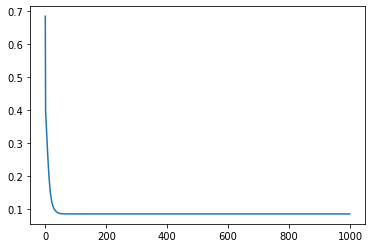

In [219]:
plt.plot(losses)

In [220]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-2]
y_test = data_test[:,-2:]

bias = np.ones((X_test.shape[0],1))
X_test = np.hstack([bias,X_test])

In [221]:
y_true = np.argmax(y_test,axis=1)
y_true

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [222]:
Scores_new = X_test@W
probs = softmax(Scores_new)
pred = np.argmax(probs,axis=1)

In [223]:
accuracy = np.mean(y_true==pred)

In [224]:
accuracy

0.9571428571428572